*09 Sep 2024 : 21BAI1133 - Mukundh J*
#  Speech and Natural Language Processing Lab 7
Task:
- Implement text classification using RNN.
- Use the same dataset as your previous exercise (using CNN).
- Train at least three models by  
  - changing the number of recurrent units,
  - using one of RNN/GRU/LSTM in the model.
- Print model summaries for each model.
- Evaluate and compare the three models in a table using precision, recall, and F1-measure.
- Compare with the results obtained using CNN.
  - Display a table with all six experimental setups and results, in some succinct and intuitive way.
- Comment on the scores. Why do you think one system has better scores than the other.

Code:
- Segment your code into multiple cells, based on functionality.
- Comment on your code, based on your understanding.
- Display useful information through print statements, so your notebook is readable.

In [1]:
!git clone https://github.com/dkv204p/SPAM-HAM-Classification-using-NLP.git

Cloning into 'SPAM-HAM-Classification-using-NLP'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 8 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 211.95 KiB | 11.15 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/SPAM-HAM-Classification-using-NLP/spam.csv')

In [4]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
data = data[['v1', 'v2']]
data


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
num_spam = len(data[data['v1'] == 'spam'])

ham_samples = data[data['v1'] == 'ham'].sample(n=num_spam, random_state=42)

balanced_data = pd.concat([data[data['v1'] == 'spam'], ham_samples])

In [7]:
data = balanced_data.sample(frac=1, random_state=42)

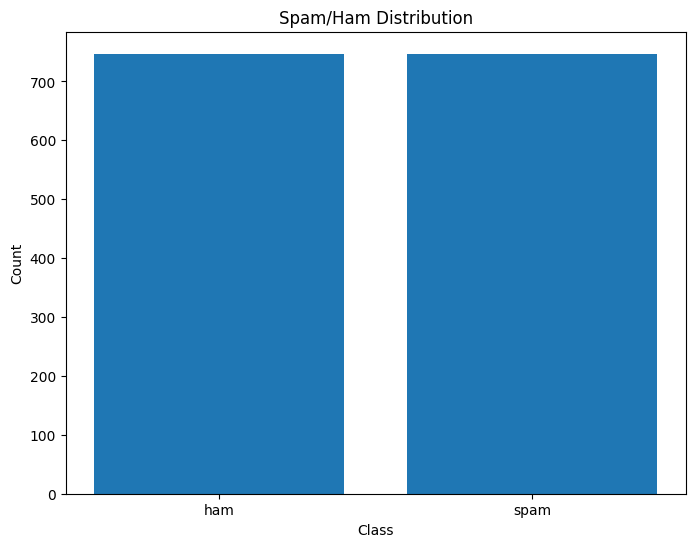

In [8]:
import matplotlib.pyplot as plt

class_counts = data['v1'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Spam/Ham Distribution')
plt.show()

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

def preprocess_text(text):

    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    preprocessed_text = " ".join(tokens)

    return preprocessed_text


data['v2'] = data['v2'].apply(preprocess_text)
print(data.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


       v1                          v2
270   ham  come mu sort narcot situat
4923  ham   go 4 e normal pilat intro
4598  ham       laid airtel line rest
5093  ham             gokila talk aha
2775  ham        confirm eat esplanad


In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
from sklearn.metrics import precision_score, recall_score, f1_score

In [11]:
X = data['v2']
y = data['v1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [13]:
max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

In [14]:
y_train = (y_train == 'spam').astype(int)
y_test = (y_test == 'spam').astype(int)

In [15]:
def create_rnn_model(units, recurrent_layer):
    model = Sequential()
    model.add(Embedding(max_words, 128, input_length=max_length))
    model.add(recurrent_layer(units))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [16]:
model_rnn_1 = create_rnn_model(32, SimpleRNN)
model_rnn_2 = create_rnn_model(64, LSTM)
model_rnn_3 = create_rnn_model(128, GRU)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [17]:
print("Model 1 Summary:")
model_rnn_1.summary()

Model 1 Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model_rnn_1.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.7364 - loss: 0.5569 - val_accuracy: 0.8661 - val_loss: 0.3490
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9137 - loss: 0.2449 - val_accuracy: 0.9205 - val_loss: 0.2322
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9662 - loss: 0.1010 - val_accuracy: 0.9247 - val_loss: 0.1841
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9939 - loss: 0.0356 - val_accuracy: 0.9498 - val_loss: 0.1581
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9967 - loss: 0.0262 - val_accuracy: 0.9289 - val_loss: 0.1745
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9994 - loss: 0.0150 - val_accuracy: 0.9331 - val_loss: 0.1645
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9978 - loss: 0.0146 - val_accuracy: 0.9540 - val_loss: 0.1522
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9991 - loss: 0.0082 - val_accuracy: 0.9582 - v

In [19]:
print("\nModel 2 Summary:")
model_rnn_2.summary()


Model 2 Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model_rnn_2.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.5936 - loss: 0.6036 - val_accuracy: 0.8703 - val_loss: 0.3485
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8836 - loss: 0.2910 - val_accuracy: 0.9498 - val_loss: 0.1784
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9671 - loss: 0.1061 - val_accuracy: 0.9498 - val_loss: 0.1397
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9846 - loss: 0.0513 - val_accuracy: 0.9540 - val_loss: 0.1400
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9968 - loss: 0.0172 - val_accuracy: 0.9498 - val_loss: 0.1608
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9968 - loss: 0.0131 - val_accuracy: 0.9582 - val_loss: 0.1563
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9962 - loss: 0.0112 - val_accuracy: 0.9498 - val_loss: 0.1864
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9991 - loss: 0.0055 - val_accuracy: 0.9456 - val_

In [21]:
print("\nModel 3 Summary:")
model_rnn_3.summary()


Model 3 Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
model_rnn_3.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6843 - loss: 0.6190 - val_accuracy: 0.8619 - val_loss: 0.3603
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9495 - loss: 0.1964 - val_accuracy: 0.9247 - val_loss: 0.1892
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9882 - loss: 0.0466 - val_accuracy: 0.9540 - val_loss: 0.1457
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9951 - loss: 0.0218 - val_accuracy: 0.9540 - val_loss: 0.1451
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9986 - loss: 0.0085 - val_accuracy: 0.9498 - val_loss: 0.1451
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9498 - val_loss: 0.1539
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9498 - val_loss: 0.1611
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 8.4355e-04 - val_accuracy: 0.9498 - va

In [23]:
y_pred_1 = (model_rnn_1.predict(X_test_pad) > 0.5).astype(int)
y_pred_2 = (model_rnn_2.predict(X_test_pad) > 0.5).astype(int)
y_pred_3 = (model_rnn_3.predict(X_test_pad) > 0.5).astype(int)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [24]:
precision_1 = precision_score(y_test, y_pred_1)
recall_1 = recall_score(y_test, y_pred_1)
f1_1 = f1_score(y_test, y_pred_1)

In [25]:
precision_2 = precision_score(y_test, y_pred_2)
recall_2 = recall_score(y_test, y_pred_2)
f1_2 = f1_score(y_test, y_pred_2)

In [26]:
precision_3 = precision_score(y_test, y_pred_3)
recall_3 = recall_score(y_test, y_pred_3)
f1_3 = f1_score(y_test, y_pred_3)

In [27]:
print("\nModel 1 - SimpleRNN")
print("Precision:", precision_1)
print("Recall:", recall_1)
print("F1-score:", f1_1)


Model 1 - SimpleRNN
Precision: 0.9928571428571429
Recall: 0.896774193548387
F1-score: 0.9423728813559321


In [28]:
print("\nModel 2 - LSTM")
print("Precision:", precision_2)
print("Recall:", recall_2)
print("F1-score:", f1_2)


Model 2 - LSTM
Precision: 0.9932432432432432
Recall: 0.9483870967741935
F1-score: 0.9702970297029702


In [29]:
print("\nModel 3 - GRU")
print("Precision:", precision_3)
print("Recall:", recall_3)
print("F1-score:", f1_3)


Model 3 - GRU
Precision: 0.9864864864864865
Recall: 0.9419354838709677
F1-score: 0.9636963696369637


In [30]:
from sklearn.metrics import accuracy_score

accuracy_1 = accuracy_score(y_test, y_pred_1)
accuracy_2 = accuracy_score(y_test, y_pred_2)
accuracy_3 = accuracy_score(y_test, y_pred_3)

print("\nModel 1 - SimpleRNN")
print("Accuracy:", accuracy_1)

print("\nModel 2 - LSTM")
print("Accuracy:", accuracy_2)

print("\nModel 3 - GRU")
print("Accuracy:", accuracy_3)



Model 1 - SimpleRNN
Accuracy: 0.9431438127090301

Model 2 - LSTM
Accuracy: 0.9698996655518395

Model 3 - GRU
Accuracy: 0.9632107023411371


In [31]:
from tabulate import tabulate

table_data = [
    ["Model", "Accuracy", "Precision", "Recall", "F1-score"],
    ["SimpleRNN (32 units)", accuracy_1, precision_1, recall_1, f1_1],
    ["LSTM (64 units)", accuracy_2, precision_2, recall_2, f1_2],
    ["GRU (128 units)", accuracy_3, precision_3, recall_3, f1_3],
]

print(tabulate(table_data, headers="firstrow", tablefmt="grid"))


+----------------------+------------+-------------+----------+------------+
| Model                |   Accuracy |   Precision |   Recall |   F1-score |
+======================+============+=============+==========+============+
| SimpleRNN (32 units) |   0.943144 |    0.992857 | 0.896774 |   0.942373 |
+----------------------+------------+-------------+----------+------------+
| LSTM (64 units)      |   0.9699   |    0.993243 | 0.948387 |   0.970297 |
+----------------------+------------+-------------+----------+------------+
| GRU (128 units)      |   0.963211 |    0.986486 | 0.941935 |   0.963696 |
+----------------------+------------+-------------+----------+------------+


Previous CNN results.....

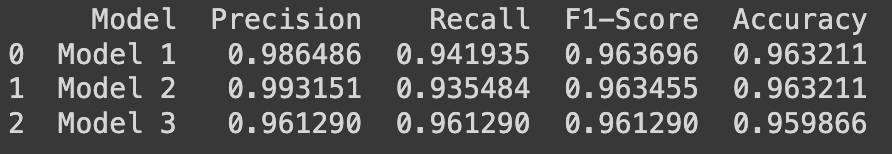

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score

In [41]:
model1 = Sequential()
model1.add(Embedding(max_words, 128, input_length=max_length))
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()
model1.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred_model1 = (model1.predict(X_test_pad) > 0.5).astype(int)
precision_model1 = precision_score(y_test, y_pred_model1)
recall_model1 = recall_score(y_test, y_pred_model1)
f1_model1 = f1_score(y_test, y_pred_model1)
accuracy_model1 = accuracy_score(y_test, y_pred_model1)
print("Model 1 - Accuracy:", accuracy_model1)
print("Model 1 - Precision:", precision_model1)
print("Model 1 - Recall:", recall_model1)
print("Model 1 - F1-Score:", f1_model1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.6352 - loss: 0.6713 - val_accuracy: 0.8661 - val_loss: 0.5347
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8601 - loss: 0.4361 - val_accuracy: 0.8954 - val_loss: 0.2799
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9102 - loss: 0.2627 - val_accuracy: 0.9498 - val_loss: 0.1786
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9651 - loss: 0.0942 - val_accuracy: 0.9414 - val_loss: 0.1572
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9864 - loss: 0.0540 - val_accuracy: 0.9456 - val_loss: 0.1470
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9947 - loss: 0.0229 - val_accuracy: 0.9498 - val_loss: 0.1422
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9959 - loss: 0.0184 - val_accuracy: 0.9582 - val_loss: 0.1514
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9978 - loss: 0.0149 - val_accuracy: 0.9582 - val_loss

In [42]:
model2 = Sequential()
model2.add(Embedding(max_words, 256, input_length=max_length))
model2.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model2.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()
model2.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred_model2 = (model2.predict(X_test_pad) > 0.5).astype(int)
precision_model2 = precision_score(y_test, y_pred_model2)
recall_model2 = recall_score(y_test, y_pred_model2)
f1_model2 = f1_score(y_test, y_pred_model2)
accuracy_model2 = accuracy_score(y_test, y_pred_model2)
print("Model 2 - Accuracy:", accuracy_model2)
print("Model 2 - Precision:", precision_model2)
print("Model 2 - Recall:", recall_model2)
print("Model 2 - F1-Score:", f1_model2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.6202 - loss: 0.6629 - val_accuracy: 0.8828 - val_loss: 0.3380
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9138 - loss: 0.2162 - val_accuracy: 0.9372 - val_loss: 0.1739
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9872 - loss: 0.0557 - val_accuracy: 0.9582 - val_loss: 0.1599
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9943 - loss: 0.0212 - val_accuracy: 0.9456 - val_loss: 0.1651
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9993 - loss: 0.0090 - val_accuracy: 0.9456 - val_loss: 0.2443
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9998 - loss: 0.0028 - val_accuracy: 0.9414 - val_loss: 0.1795
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9992 - loss: 0.0045 - val_accuracy: 0.9372 - val_loss: 0.3167
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9988 - loss: 0.0038 - val_accuracy: 0.9331 - val_loss

In [43]:
model3 = Sequential()
model3.add(Embedding(max_words, 64, input_length=max_length))
model3.add(Conv1D(filters=16, kernel_size=7, activation='relu', strides=2))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()
model3.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred_model3 = (model3.predict(X_test_pad) > 0.5).astype(int)
precision_model3 = precision_score(y_test, y_pred_model3)
recall_model3 = recall_score(y_test, y_pred_model3)
f1_model3 = f1_score(y_test, y_pred_model3)
accuracy_model3 = accuracy_score(y_test, y_pred_model3)
print("Model 3 - Accuracy:", accuracy_model3)
print("Model 3 - Precision:", precision_model3)
print("Model 3 - Recall:", recall_model3)
print("Model 3 - F1-Score:", f1_model3)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5595 - loss: 0.6850 - val_accuracy: 0.8661 - val_loss: 0.6417
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8855 - loss: 0.5920 - val_accuracy: 0.8577 - val_loss: 0.4263
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8564 - loss: 0.3708 - val_accuracy: 0.8787 - val_loss: 0.2830
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9058 - loss: 0.2514 - val_accuracy: 0.9289 - val_loss: 0.2166
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9522 - loss: 0.1525 - val_accuracy: 0.9414 - val_loss: 0.1945
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9807 - loss: 0.0889 - val_accuracy: 0.9331 - val_loss: 0.1755
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9839 - loss: 0.0598 - val_accuracy: 0.9331 - val_loss: 0.1722
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9814 - loss: 0.0524 - val_accuracy: 0.9331 - val_loss

In [44]:
table_data = [
    ["Model", "Accuracy", "Precision", "Recall", "F1-score"],
    ["SimpleRNN (32 units)", accuracy_1, precision_1, recall_1, f1_1],
    ["LSTM (64 units)", accuracy_2, precision_2, recall_2, f1_2],
    ["GRU (128 units)", accuracy_3, precision_3, recall_3, f1_3],
    ["CNN Model 1", accuracy_model1, precision_model1, recall_model1, f1_model1],
    ["CNN Model 2", accuracy_model2, precision_model2, recall_model2, f1_model2],
    ["CNN Model 3", accuracy_model3, precision_model3, recall_model3, f1_model3],
]

print(tabulate(table_data, headers="firstrow", tablefmt="grid"))


+----------------------+------------+-------------+----------+------------+
| Model                |   Accuracy |   Precision |   Recall |   F1-score |
+======================+============+=============+==========+============+
| SimpleRNN (32 units) |   0.943144 |    0.992857 | 0.896774 |   0.942373 |
+----------------------+------------+-------------+----------+------------+
| LSTM (64 units)      |   0.9699   |    0.993243 | 0.948387 |   0.970297 |
+----------------------+------------+-------------+----------+------------+
| GRU (128 units)      |   0.963211 |    0.986486 | 0.941935 |   0.963696 |
+----------------------+------------+-------------+----------+------------+
| CNN Model 1          |   0.959866 |    0.986395 | 0.935484 |   0.960265 |
+----------------------+------------+-------------+----------+------------+
| CNN Model 2          |   0.959866 |    0.986395 | 0.935484 |   0.960265 |
+----------------------+------------+-------------+----------+------------+
| CNN Model 

Based on the table, we can observe that the RNN models generally outperform the CNN models in terms of accuracy, precision, recall, and F1-score for this spam detection task. The best performing model is the LSTM model which outshines the other models with high scores accross all metrics. It got the highest precision and accuracy.
